# Diabetes Dataset - Regression Example

scikit-learn has some preloaded datasets that can be useful in exploring its functionality. It's a good way to get started really quickly and temporarily ignore writing the boilerplate code to actually import and prepare your data for processing (which is definitely important to learn eventually!).

In the following sections, the code illustrates how we take a dataset about diabetes progression and build a regression model to try predicting it. The dataset consists of data from various patients such as age, gender, BMI, etc. along with with 6 blood serum measurements. 

The sections below walk you through the 3 common stages of working with Machine Learning models:

1. Load data
2. Train model
3. Test/validate model

-----

## 1. Load and explore the data

The cells in this section illustrate how to load and explore a dataset from scikit-learn. 

For a complete list of the available "toy datasets", see https://scikit-learn.org/stable/datasets/index.html#toy-datasets

Also note that scikit-learn has several much larger datasets you can load and run models against: https://scikit-learn.org/stable/datasets/index.html#real-world-datasets

In [1]:
# Import scikit-learn's scikit-learn's module to use their "toy datasets"
from sklearn import datasets

In [2]:
# Loads in the Diabetes dataset
diabetes = datasets.load_diabetes()

In [3]:
# Description of the dataset
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Brad

In [4]:
# feature_names shows what each column represents
print(diabetes.feature_names)
# data is the matrix INPUT features in the dataset
print(diabetes.data)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]


In [5]:
# Check dimensions of the input feature matrix
diabetes.data.shape
# (442, 10) = 442 rows x 10 columns = 442 observations x 10 input features each

(442, 10)

In [6]:
# target shows the values of the output
print(diabetes.target)
# These values represent a "quantitative measure of disease progression one year after baseline."

[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 116.  86. 122.
  72. 

In [7]:
# Check dimensions of the output
diabetes.target.shape
# (442,) = Array of 442 elements = 442 target values (1 per observation)

(442,)

-----

## 2. Train the Model

This section shows you how to go about training your decision tree.

It illustrates the steps of:

1. Preparing a train vs test dataset
2. Initializing and training the decision tree classifier
3. Visualizing the decision tree

In [8]:
# Setup the training and test datasets
# Training data allows us to train the model
# Test dataset allows us to then validate the accuracy predictions of that model

# We want to split the dataset randomly to get the test and train datasets
# We're using sklearn function `train_test_split` that randomizes the split for us
from sklearn.model_selection import train_test_split

# sklearn convention is to use "X" for input feature matrix, "y" for target values
X_train, X_test, y_train, y_test = train_test_split(
    diabetes.data,    # sampled input features
    diabetes.target,  # target values corresponding to inputs
    test_size=0.25    # 25% of the dataset used for test dataset
)

In [9]:
# Let's inspect the splits
print("X_train shape: " + str(X_train.shape))
print("X_test shape: " + str(X_test.shape))
print("y_train: " + str(y_train))
print("y_test: " + str(y_test))

X_train shape: (331, 10)
X_test shape: (111, 10)
y_train: [233. 244. 257.  44. 134. 134. 104.  50.  83. 202. 235. 245. 220. 104.
 171.  64. 138. 248. 292. 210.  93. 104. 180. 121. 132. 199.  84.  78.
  91.  48. 222.  57.  86.  55. 128. 249. 232. 124. 142.  63.  37. 270.
  66. 270. 168. 168.  75. 151. 230. 145. 217.  77.  71. 310. 306.  95.
  65. 310. 179. 111.  67.  55. 235. 143.  65. 281. 113.  72. 216.  87.
 127.  98. 196. 101.  59. 198. 209. 197.  77.  65.  52.  53.  97.  64.
 115. 296. 243.  96.  40. 178. 136. 265.  48. 196. 190. 185.  53. 142.
 150. 142.  48. 180.  60. 137. 259. 200. 167. 166. 150. 292. 128. 170.
 186. 109. 202. 129. 332.  99.  72. 115. 219.  55. 104. 202. 191. 144.
 273.  63.  55. 259.  81. 111. 217. 139. 184. 138.  87.  65. 268. 200.
 275. 127. 192.  60. 150. 181.  88.  96. 221.  79. 170. 140.  54. 181.
 275.  67.  75. 236. 168. 118. 206. 137. 144.  97.  42.  51. 202. 177.
  42. 336. 281.  71. 206. 139.  94. 156. 281.  94.  85. 113. 185. 245.
 114. 233.  68. 264

In [10]:
from sklearn import linear_model

# "regr" by scikit-learn convention is a variable name used for regression models
regr = linear_model.LinearRegression()

# Simply printing this object will show the available parameters we can set when initializing it
# Since we didn't set any, the printed values will show the defaults
print(regr)
# For the very curious, you can read the docstring to see what the various parameters mean here:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [11]:
# Train the regression model
regr = regr.fit(X_train, y_train)

-----

## 3. Test the model

Final step is to validate the accuracy of your resulting model. These cells illustrate:

1. How to get predicted values from your trained model
2. How to measure the accuracy of your predictions using scikit-learn

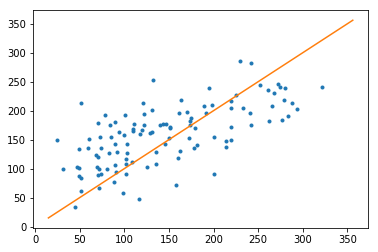

In [12]:
%matplotlib inline

# matplotlib is a handy Python library used for visualizations
import matplotlib.pylab as plt
import numpy as np

# Predict the values from your test inputs X_test
y_pred = regr.predict(X_test)

# Let's visualize how the predicted values vary from the expected
# We'll plot the two against each other, and compare against a line going right through the origin
# If the model was perfect, all the values would lie along this line

# Plot actual vs predicted values for test dataset
plt.plot(y_test, y_pred, '.')

# Plot the perfect line representing a 100% accuracy in predictions
x = np.linspace(min(diabetes.target) - 10, max(diabetes.target) + 10, 100)
y = x
plt.plot(x, y)

plt.show()

In [13]:
# Formal accuracy metrics

# Outputs the proportion of predictions that were correct
# i.e., 1.0 = 100% accurate, 0.0 = 0% accurate
score = regr.score(X_test, y_test)
print(score)

0.3975036494442554
